## Exploratory Data Analysis Student Report

* Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools.
The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. 
Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). 
In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks.  


### Legend
* Medu = Mother's education
* Fedu = Father's education
* Walc = Weekend alcohol consumption
* Dalc = Workday alcohol consumption 
* Goout = Go out with friends
* Famrel = Family relation

## Imports

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings

## Reading the data


In [3]:
#reading de csv file
csv_path = "Data/student-por.xls"
df = pd.read_csv(csv_path)

## First look at data

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
# first data statistics
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### Searching for wrong values


In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

## Modeling and grouping the data


In [9]:
#Creating a new column for the total value that is the sum of all grades for better analysis
df_values = df[['G1','G2','G3']]
df['total'] = df_values.sum(axis=1)
#Filtering the data that interest us
df_filtered = df[['traveltime','goout','sex','age','address','Medu','Fedu','traveltime','studytime','famrel','freetime','Dalc','Walc','health','G1','G2','G3','total']]


In [10]:
#Creating the filters for the highest and lowest grades
df_filteredH = df_filtered.sort_values(by='total',ascending=False)
df_filteredH.head()

,traveltime,goout,sex,age,address,Medu,Fedu,traveltime,studytime,famrel,freetime,Dalc,Walc,health,G1,G2,G3,total
338,2,2,F,17,R,3,1,2,4,3,1,1,1,3,18,19,19,56
636,1,4,M,18,U,4,4,1,2,3,2,1,4,2,17,18,19,54
606,2,3,F,17,U,4,2,2,4,4,2,3,1,5,18,18,18,54
332,1,3,F,18,U,2,2,1,3,4,3,1,2,2,18,18,18,54
594,2,5,F,18,U,4,4,2,2,4,3,1,2,1,18,18,18,54


In [11]:
df_filteredL = df_filtered.sort_values(by='total')
df_filteredL.head()

,traveltime,goout,sex,age,address,Medu,Fedu,traveltime,studytime,famrel,freetime,Dalc,Walc,health,G1,G2,G3,total
567,1,1,M,18,R,3,2,1,1,2,3,2,2,5,4,0,0,4
603,1,1,F,18,R,4,2,1,2,5,3,1,1,5,5,0,0,5
605,2,5,F,19,U,1,1,2,1,5,5,2,3,2,5,0,0,5
563,1,1,M,17,U,2,2,1,1,1,2,2,3,5,7,0,0,7
440,2,5,M,16,U,1,1,2,2,5,4,4,5,3,7,0,0,7


## Data Visualization

### Histogram plot

Text(0, 0.5, 'Frequency')

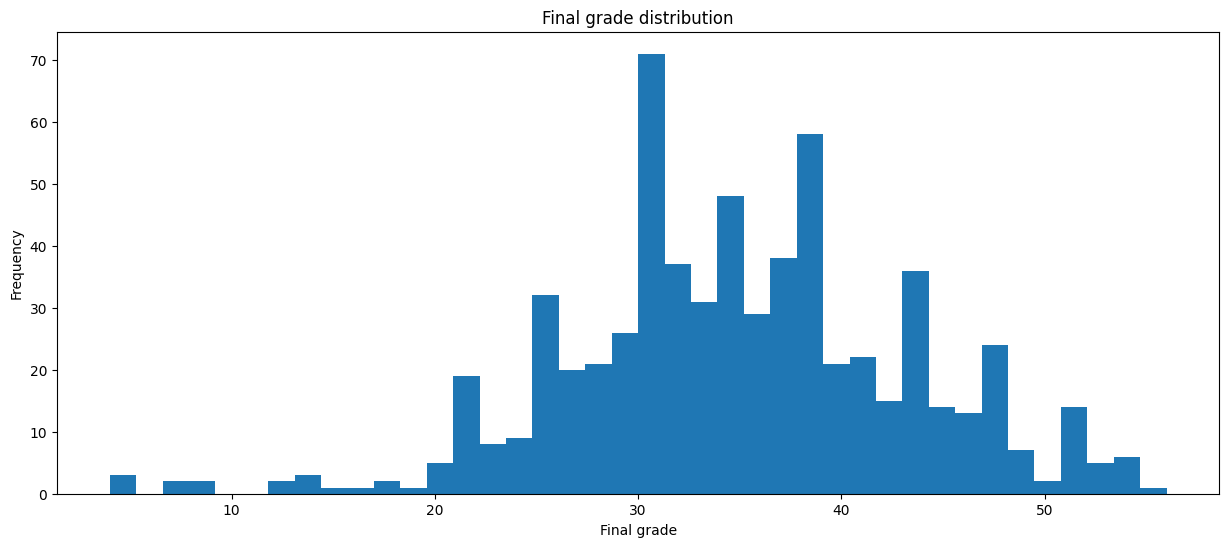

In [12]:
# Histogram plot 
plt.figure(figsize=(15,6))
plt.hist(df['total'],bins=40) #40 bins for better visuaization of data
plt.title('Final grade distribution')
plt.xlabel('Final grade')
plt.ylabel('Frequency')

### Insights:
* In the plot we can see that have an average score between 25 and 45.
* Peak in 30
* The plot is relative symmetrical

#### Correlation plot

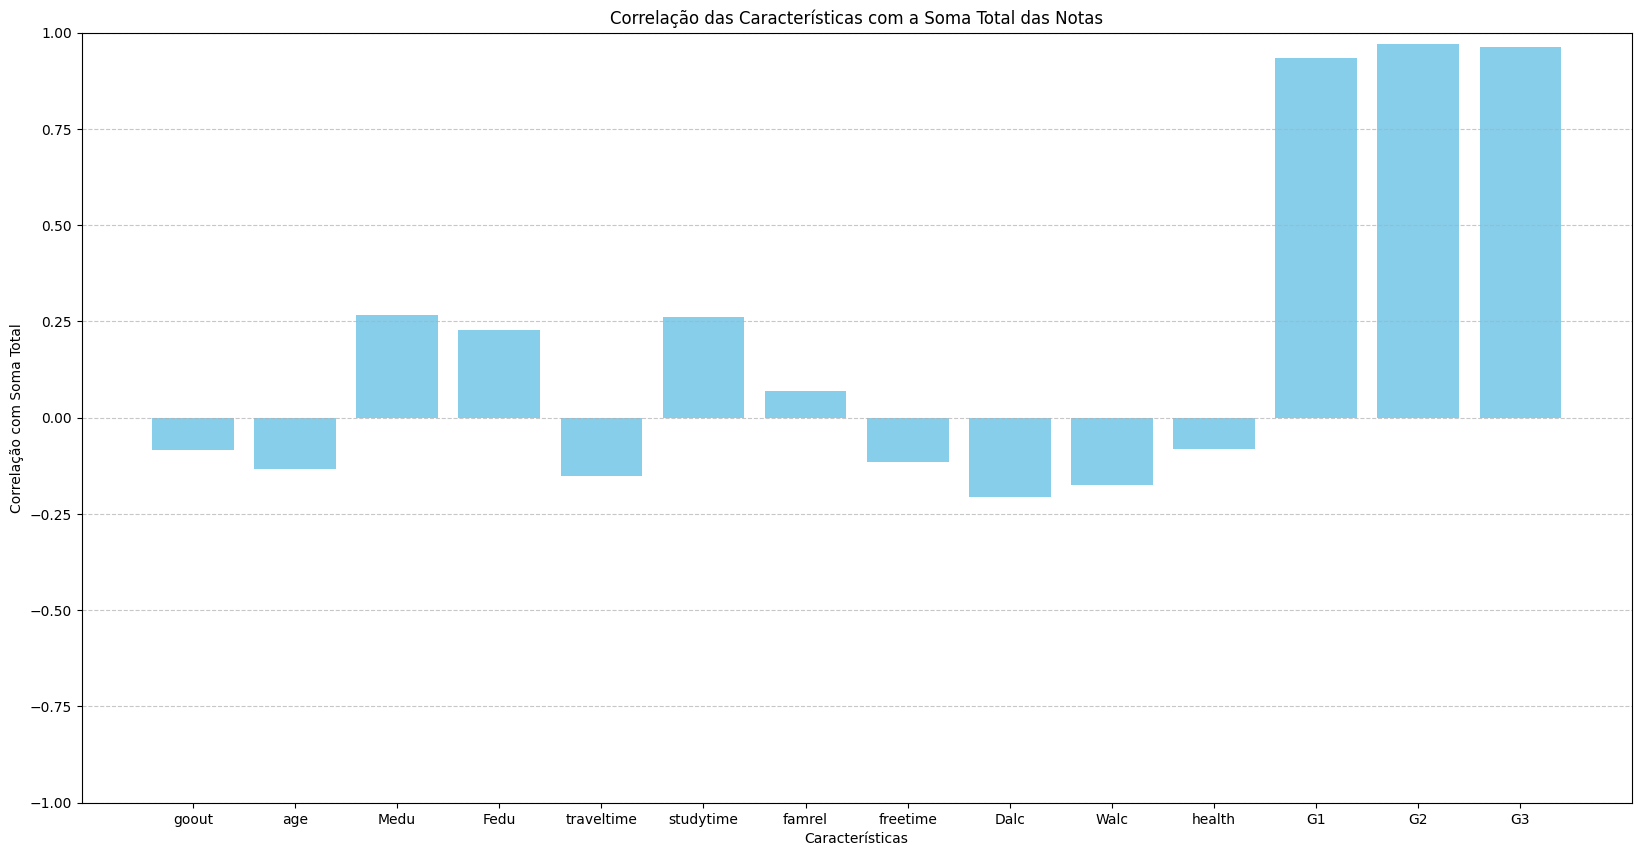

In [13]:


variables = ['goout','age','Medu','Fedu','traveltime','studytime','famrel','freetime','Dalc','Walc','health','G1','G2','G3','total']
corre = df[variables].corr()['total'].drop('total')
plt.figure(figsize=(20, 10))
plt.bar(corre.index, corre.values, color='skyblue')
plt.xlabel('Características')
plt.ylabel('Correlação com Soma Total')
plt.title('Correlação das Características com a Soma Total das Notas')
plt.ylim([-1, 1])  # Ajustar o intervalo dos valores de correlação
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Heat map

<Axes: >

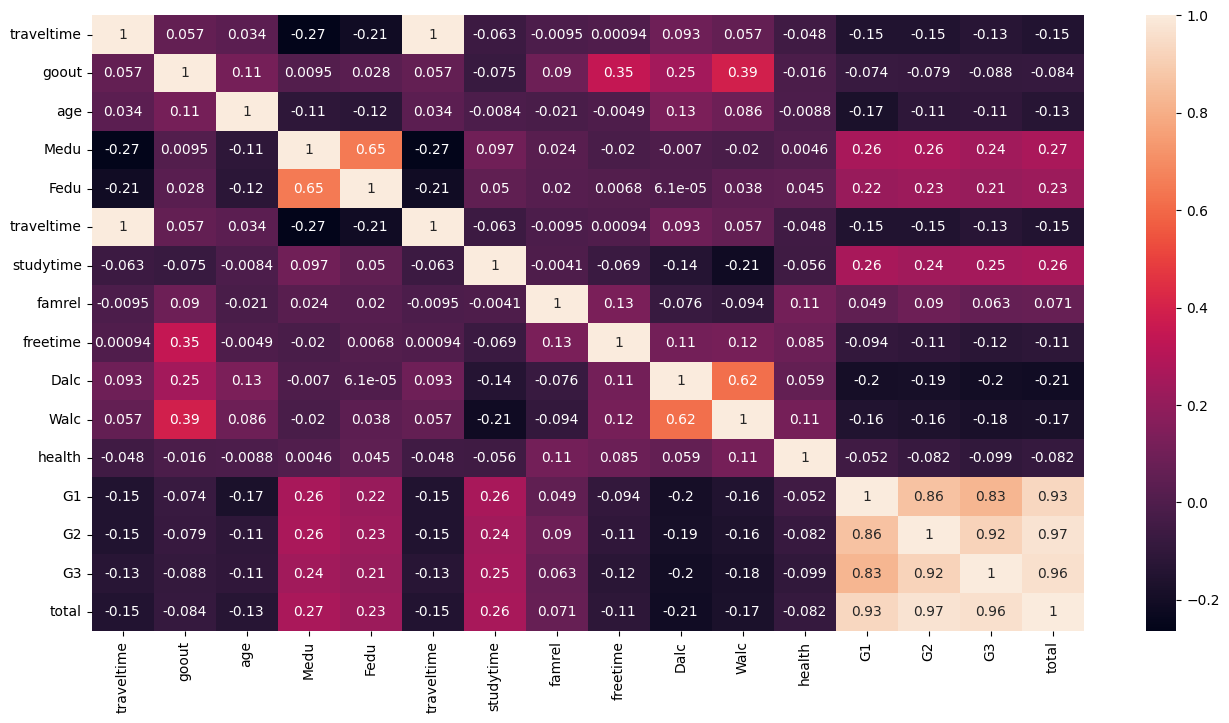

In [14]:
df_filteredI = df_filtered.drop(['sex','address'],axis=1)
plt.figure(figsize=(16,8))
corru = df_filteredI.corr()
sns.heatmap(corru,annot=True)


### Insights:
After all these plots, we see wich are the columns that have more importance for us
* Medu = Mother's education
* Fedu = Father's education
* Walc and Dalc
* StudyTime (Self explanatory)

This indicates that the family example and the family in general it's very important!

Of course, alcohol is very important in this case, we can see that the greater the alcohol consumption, the lower the score.

Father's education and Mother's education have strong correlation, this indicate that are more probably to a high escolarity person choose another of the same characteristics


### Grouping and comparing the categorical columns

Text(0, 0.5, 'Mean of Final Grade')

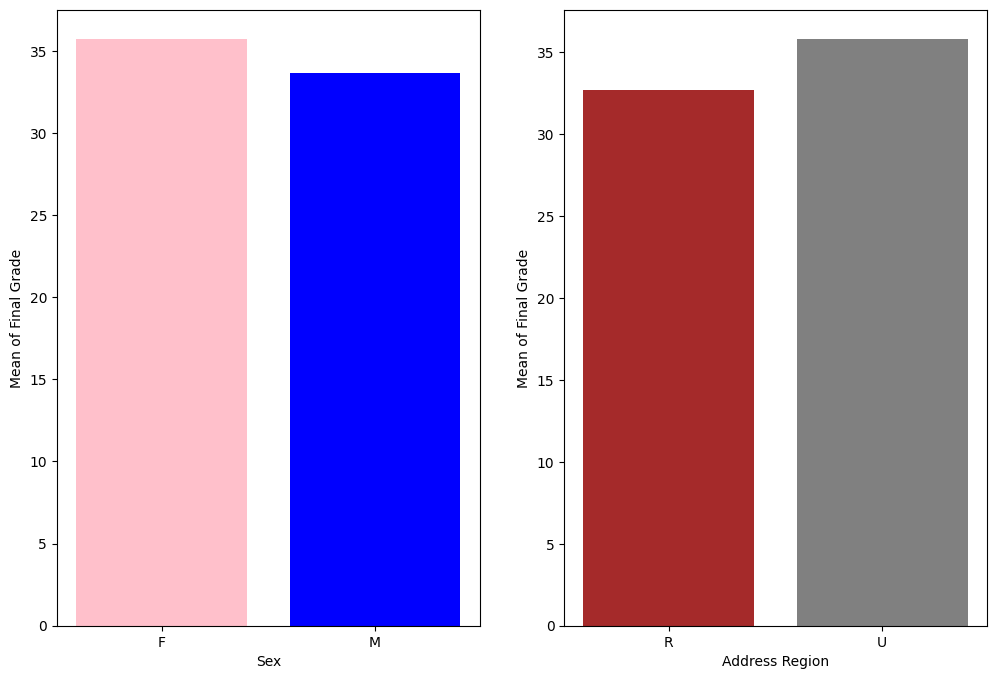

In [15]:
#Grouping by sex and Address region to compare the mean of final grades
df_groupedS = df.groupby('sex')['total'].mean().reset_index()
df_groupedA = df.groupby('address')['total'].mean().reset_index()
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.bar(df_groupedS['sex'],df_groupedS['total'],color=['pink', 'blue'])
plt.xlabel('Sex')
plt.ylabel('Mean of Final Grade')
plt.subplot(1,2,2)
plt.bar(df_groupedA['address'],df_groupedA['total'],color=['brown', 'gray'])
plt.xlabel('Address Region')
plt.ylabel('Mean of Final Grade')


* We can see that girls are more likely to get better grades than the boys
* For the address comparasion, are more common that Urban students achieve better results than the others students, probably because of best conditions to study, we can also think about the education level of parents, when the example is very important inside home we can see the correlation of these columns to the final grade of each student 


### All grades comparison with final grade

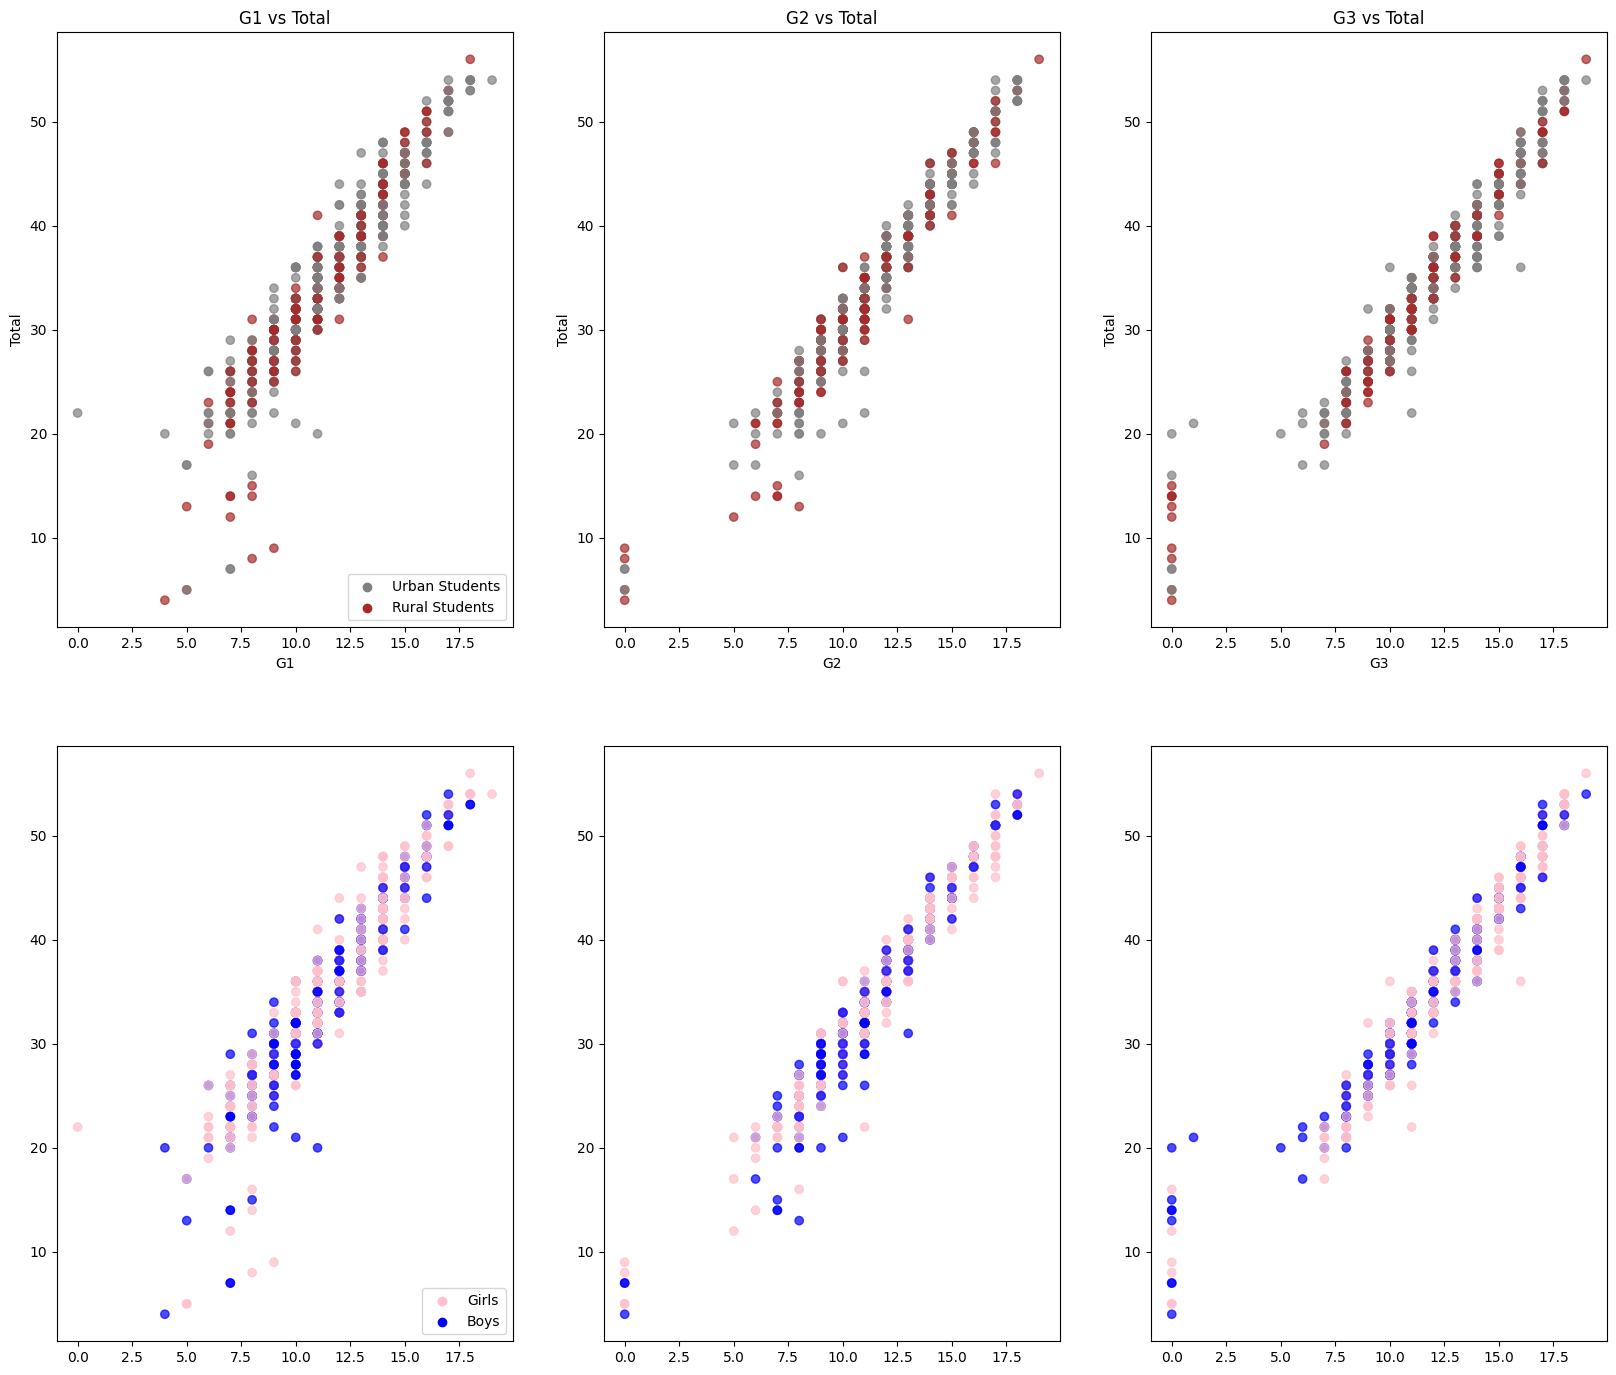

In [16]:
#All grades comparasion with final grade
colors = {'U': 'gray', 'R': 'brown','M': 'blue','F': 'pink'}
plt.figure(figsize=(20,17))
plt.subplot(2, 3, 1)
plt.scatter(df['G1'], df['total'], color=df['address'].map(colors), alpha=0.7)
plt.title('G1 vs Total')
plt.xlabel('G1')
plt.ylabel('Total')

#The code below are total copy of GPT <3
plt.scatter([], [], color='gray', label='Urban Students')
plt.scatter([], [], color='brown', label='Rural Students')
plt.legend(loc="lower right")
#

plt.subplot(2,3,2)
plt.scatter(df['G2'], df['total'], color=df['address'].map(colors), alpha=0.7)
plt.title('G2 vs Total')
plt.xlabel('G2')
plt.ylabel('Total')

plt.subplot(2,3,3)
plt.scatter(df['G3'], df['total'], color=df['address'].map(colors), alpha=0.7)
plt.title('G3 vs Total')
plt.xlabel('G3')
plt.ylabel('Total')


plt.subplot(2,3,4)
plt.scatter(df['G1'], df['total'], color=df['sex'].map(colors), alpha=0.7)
plt.legend(["Girls", "Boys"], loc="lower right")
plt.scatter([], [], color='pink', label='Girls')
plt.scatter([], [], color='blue', label='Boys')
plt.legend(loc="lower right")


plt.subplot(2,3,5)
plt.scatter(df['G2'], df['total'], color=df['sex'].map(colors), alpha=0.7)


plt.subplot(2,3,6)
plt.scatter(df['G3'], df['total'], color=df['sex'].map(colors), alpha=0.7)


#### Observations about the plot
* The rural students are more likely to get worse grades, we can see this in "G3 vs Total" plot, where have more rural students in the lower region
* But this is not an impediment, the highest grade is from a rural student! 
* In the sex plot are basically the same, boys are concetraded in lower regions than girls.

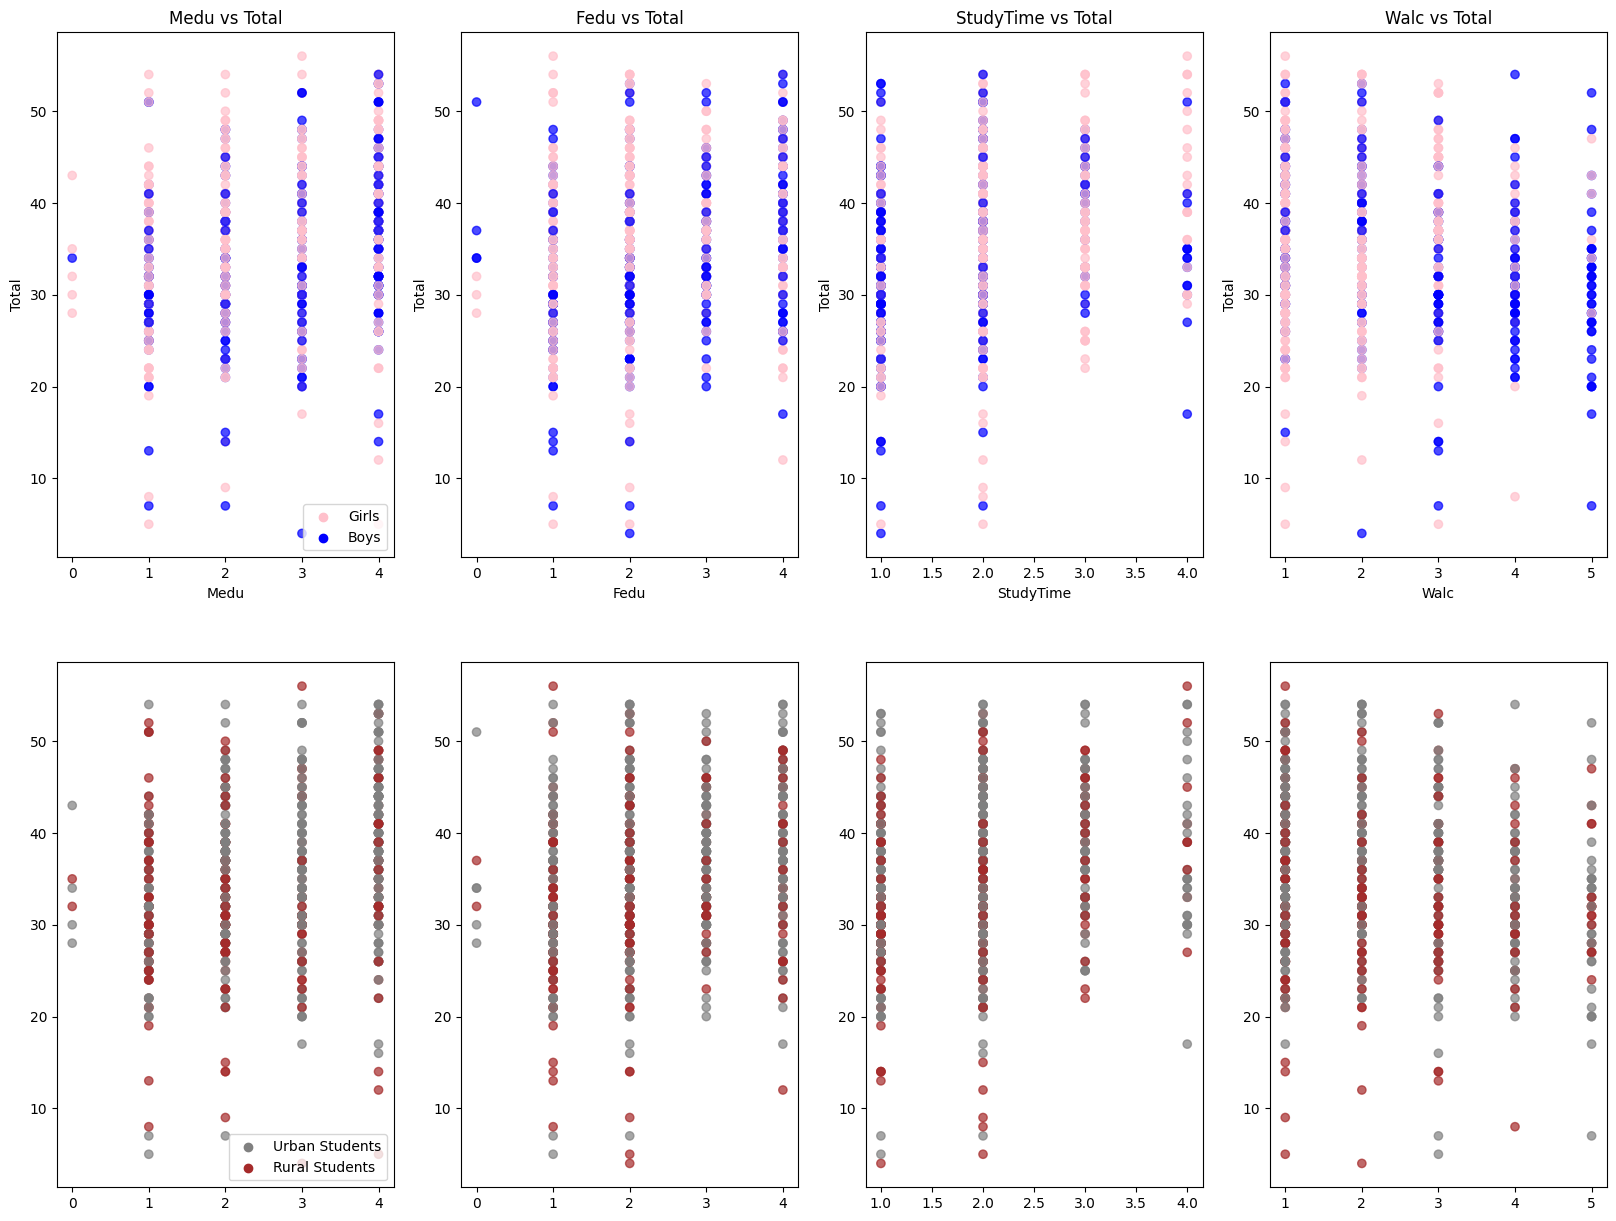

In [17]:
#All grades comparasion with final grade
colorus = {'U': 'gray', 'R': 'brown','M': 'blue','F': 'pink'}
plt.figure(figsize=(20,15))

plt.subplot(2, 4, 1)
plt.scatter(df['Medu'], df['total'], color=df['sex'].map(colorus), alpha=0.7)
plt.title('Medu vs Total')
plt.xlabel('Medu')
plt.ylabel('Total')
plt.scatter([], [], color='pink', label='Girls')
plt.scatter([], [], color='blue', label='Boys')
plt.legend(loc="lower right")

plt.subplot(2,4,2)
plt.scatter(df['Fedu'], df['total'], color=df['sex'].map(colorus), alpha=0.7)
plt.title('Fedu vs Total')
plt.xlabel('Fedu')
plt.ylabel('Total')

plt.subplot(2,4,3)
plt.scatter(df['studytime'], df['total'], color=df['sex'].map(colorus), alpha=0.7)
plt.title('StudyTime vs Total')
plt.xlabel('StudyTime')
plt.ylabel('Total')

plt.subplot(2,4,4)
plt.scatter(df['Walc'], df['total'], color=df['sex'].map(colorus), alpha=0.7)
plt.title('Walc vs Total')
plt.xlabel('Walc')
plt.ylabel('Total')

plt.subplot(2,4,5)
plt.scatter(df['Medu'], df['total'], color=df['address'].map(colorus), alpha=0.7)
plt.scatter([], [], color='gray', label='Urban Students')
plt.scatter([], [], color='brown', label='Rural Students')
plt.legend(loc="lower right")

plt.subplot(2,4,6)
plt.scatter(df['Fedu'], df['total'], color=df['address'].map(colorus), alpha=0.7)

plt.subplot(2,4,7)
plt.scatter(df['studytime'], df['total'], color=df['address'].map(colorus), alpha=0.7)

plt.subplot(2,4,8)
plt.scatter(df['Walc'], df['total'], color=df['address'].map(colorus), alpha=0.7)

### Observations
This plot above have a lot of great informations!

#### Escolarity
* First, parents of urban students are more likely to had a high education level, this proves the previous theory! 
* Second, urban students dedicate more time to studying, perhaps because of their parents' high level of education.
* In mean, the girls dedicate more time to studying than the boys.
* The comparison about girls x boys in parents escolarity are not very good.

#### Walc
* The walc is very symmetrical, but in the highest levels the urban students are more concetrated than de rural.
* Surpising mind, the girls are concentrared in the lowest levels of walc and the boys in the highests.

### Final histogram
For better view of the correlation

<Axes: xlabel='studytime', ylabel='Count'>

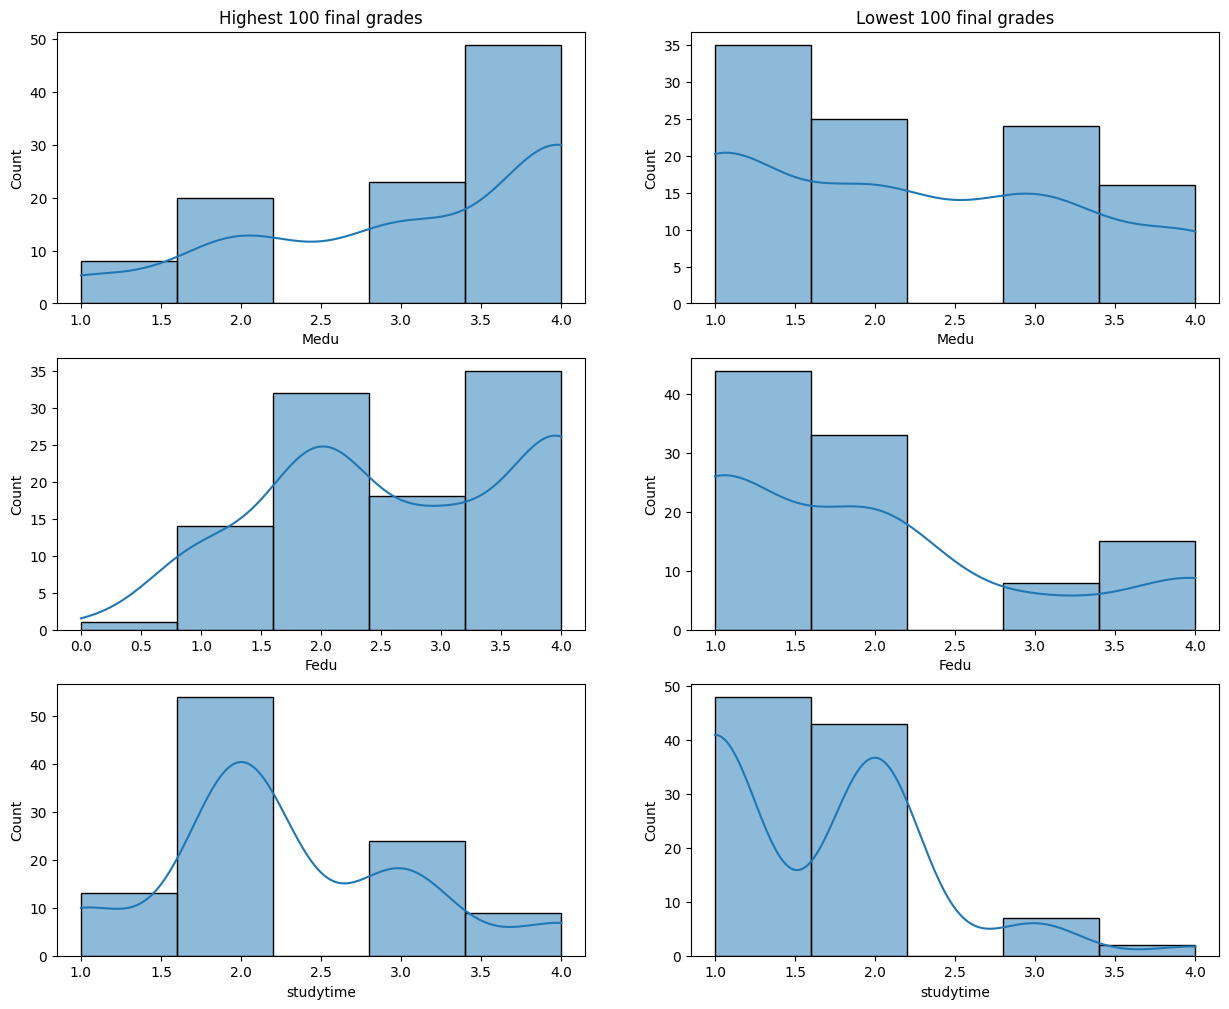

In [18]:
plt.figure(figsize=(15,12))
plt.subplot(3,2,1)
plt.title('Highest 100 final grades')
sns.histplot(df_filteredH.head(100)['Medu'],bins=5,kde=True)

plt.subplot(3,2,2)
plt.title('Lowest 100 final grades')
sns.histplot(df_filteredH.tail(100)['Medu'],bins=5,kde=True)

plt.subplot(3,2,3)
sns.histplot(df_filteredH.head(100)['Fedu'],bins=5,kde=True)

plt.subplot(3,2,4)
sns.histplot(df_filteredH.tail(100)['Fedu'],bins=5,kde=True)

plt.subplot(3,2,5)
sns.histplot(df_filteredH.head(100)['studytime'],bins=5,kde=True)

plt.subplot(3,2,6)
sns.histplot(df_filteredH.tail(100)['studytime'],bins=5,kde=True)


### Logistic Regression

In [19]:
df['total_category'] = pd.cut(df['total'], bins = 3, labels=["Low","Medium","High"])
df['total_category']

0      Medium
1      Medium
2      Medium
3        High
4      Medium
        ...  
644    Medium
645      High
646    Medium
647    Medium
648    Medium
Name: total_category, Length: 649, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [20]:
X = df.select_dtypes(include=[float,int]).drop(['total','G1','G2','G3'],axis=1)
y = df['total_category']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [22]:
target_predict = model.predict(X_test)
y[:10] == target_predict[:10]

0     True
1     True
2     True
3    False
4     True
5     True
6     True
7     True
8    False
9    False
Name: total_category, dtype: bool

In [57]:
cm = confusion_matrix(y_test, target_predict , labels=["Low", "Medium", "High"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])

<Figure size 800x600 with 0 Axes>

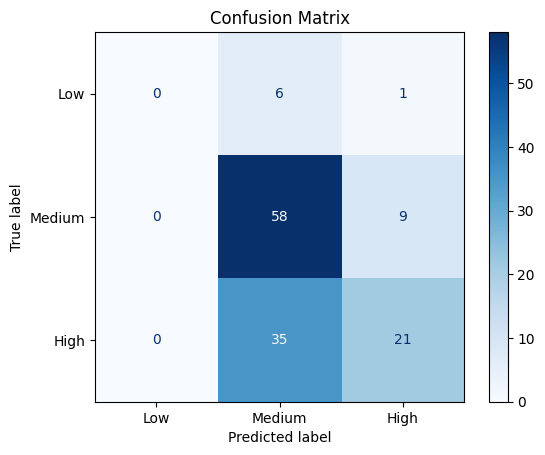

In [59]:
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### LinearRegression

In [24]:
X_l = df.select_dtypes(include=[float,int]).drop(['total','G2','G3'],axis=1) #i had to leave at least one G data, becase our data are very hard do predict with their columns
y_l = df['total']

X_trainl, X_testl, y_trainl, y_testl = train_test_split(X_l,y_l,test_size=0.2,random_state=12)

In [25]:
model_l = LinearRegression()
model_l.fit(X_trainl,y_trainl)

LinearRegression()

In [26]:
predict_l = model_l.predict(X_trainl)


In [27]:
accuracy = model_l.score(X_testl,y_testl)
accuracy

0.8851133819307372

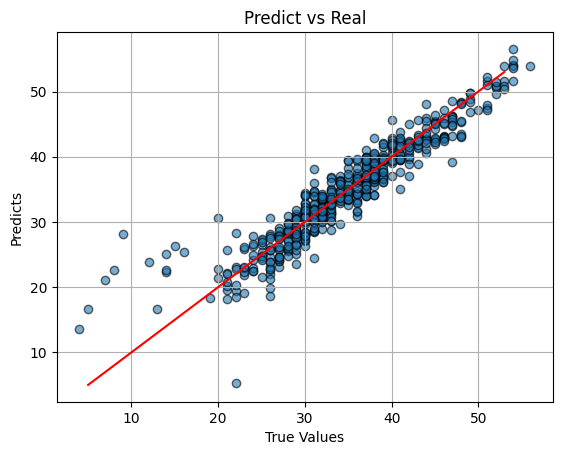

In [61]:
plt.scatter(y_trainl,predict_l,alpha=0.6,edgecolors='k')
plt.plot([y_testl.min(), y_testl.max()], [y_testl.min(), y_testl.max()], color='red', linestyle='-')
plt.xlabel('True Values')
plt.ylabel('Predicts')
plt.title('Predict vs Real')
plt.grid(True)
